In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

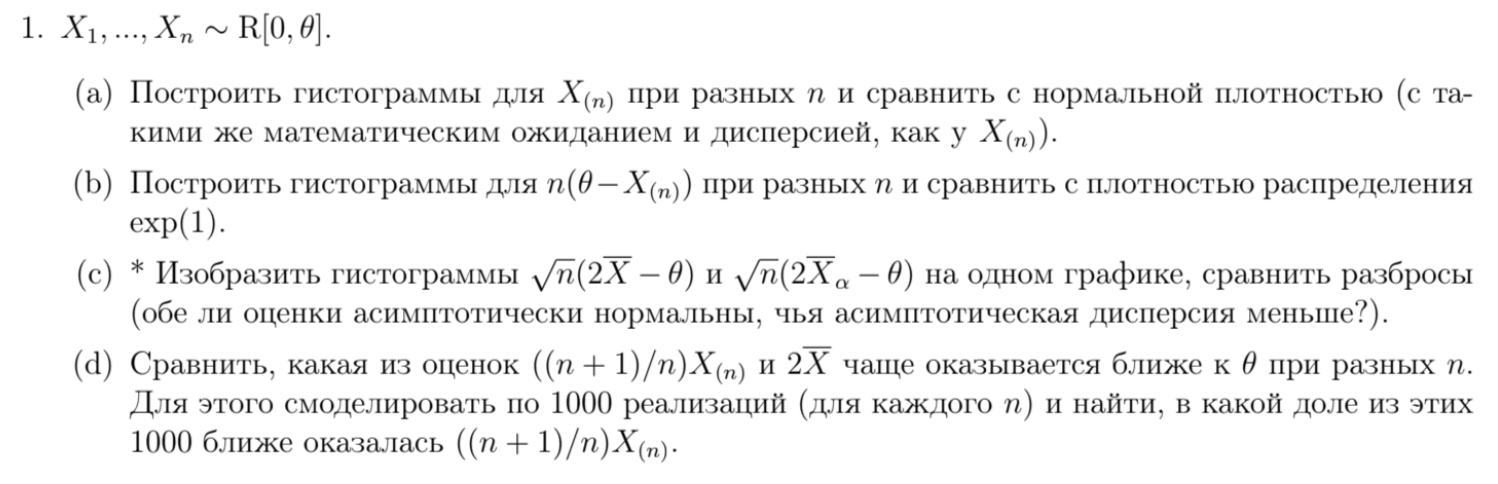

N:  10
Количесво серий:  100
Значение параметра:  1


0.9090909090909091 0.006887052341597921


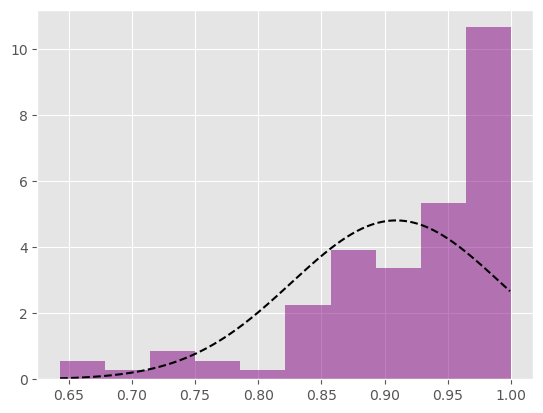

In [56]:
#a)
n = int(input("N: "))
m = int(input("Количесво серий: "))
t = float(input("Значение параметра: "))

sample = []
for i in range(m):
    x = np.random.uniform(0, t, n)
    sample.append(np.max(x))

plt.hist(sample, density=True, bins=int(m**0.5), alpha=0.5, color='purple')

coor_x = np.arange(min(sample), t, 0.001)
ex = (n/(n+1))*t
var = (n/(n+2))*(t**2) - ex**2
print(ex, var)
plt.plot(coor_x, sc.stats.norm.pdf(coor_x, ex, var**0.5), '--', color='black')

In [ ]:
#b)

n = int(input("N: "))
m = int(input("Количесво серий: "))
t = float(input("Значение параметра: "))

sample = []
for i in range(m):
    x = np.random.uniform(0, t, n)
    sample.append(np.max(x))


sample = np.array(sample)
sample *= -1
sample += t
sample *= n

coor_x = np.arange(min(sample), max(sample), 0.1)
plt.hist(sample, density=True, bins=int(m**0.5), alpha=0.5, color='purple')
plt.plot(coor_x, sc.stats.expon.pdf(coor_x), '--', color='black')

Количесво серий:  1000
Значение параметра:  1


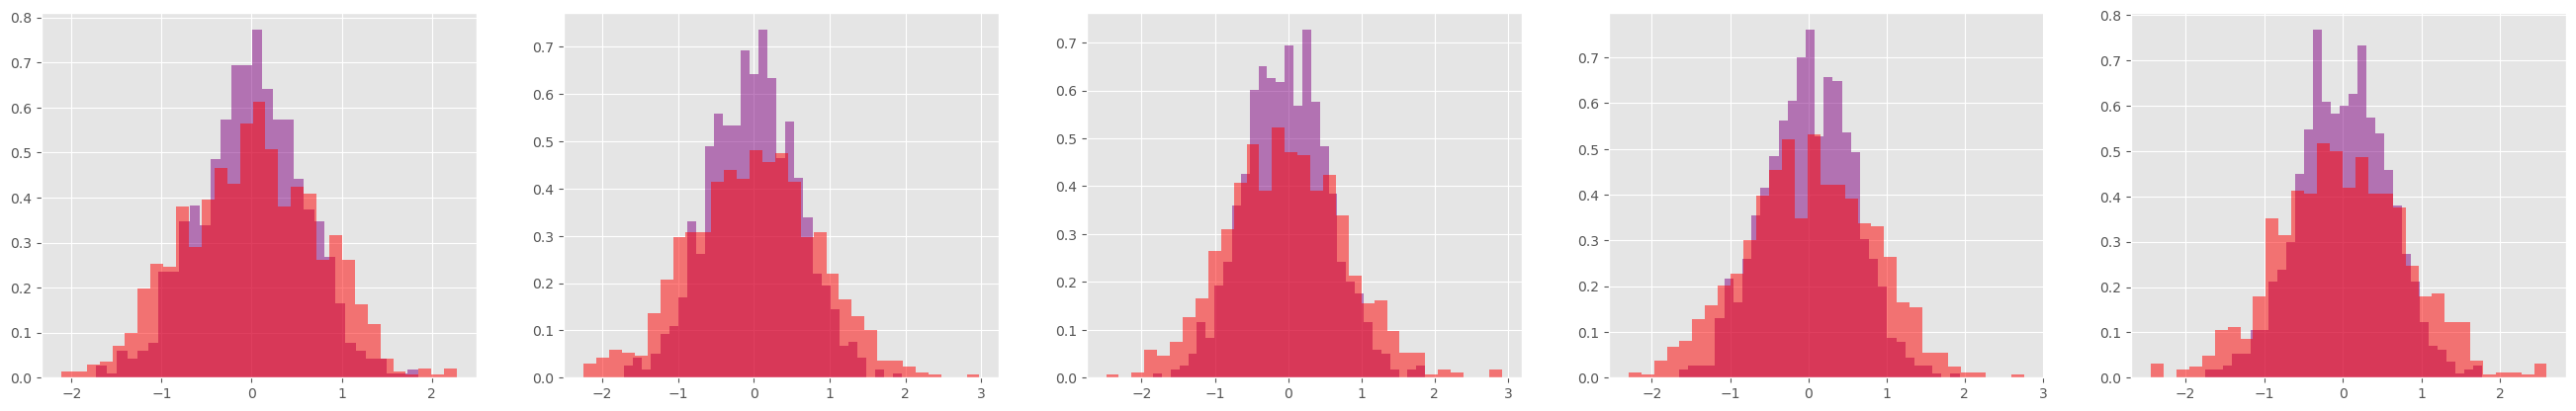

In [6]:
#c)
m = int(input("Количесво серий: "))
t = float(input("Значение параметра: "))
alpha = 0.25

plt.subplots_adjust(left = 0.01, right = 4)

for j in range(1, 6):
    plt.subplot(1, 5, j)
    
    n = 10**j
    k = int(alpha*n)
    sample1 = []
    sample2 = []
    for i in range(m):
        x = np.random.uniform(0, t, n)
        sample1.append(np.sum(x)/n)
        x = np.sort(x)
        sample2.append(np.sum(x[k : n-k])/(n-2*k))

    sample1 = np.array(sample1)
    sample2 = np.array(sample2)

    sample1 *= 2
    sample2 *=2

    sample1 -= t
    sample2 -= t

    sample1 *= n**0.5
    sample2 *= n**0.5


    plt.hist(sample1, density=True, bins=int(m**0.5), alpha=0.5, color='purple')
    plt.hist(sample2, density=True, bins=int(m**0.5), alpha=0.5, color='red')


Асимптотическая дисперсия усеченного среднего больше.

In [8]:
#d
t = float(input("Значение параметра: "))

est1 = None #Значение первой оценки
est2 = None #Значение второй оценки

#Минимальное расстояние
count = 0

for j in range(1, 8):
    n = 10**j
    count = 0
    for i in range(1000):
        x = np.random.uniform(0, t, n)
        est1 = n/(n+1)*np.max(x)
        est2 = 2*np.mean(x)
        if est1 < est2:
            count += 1
        
    print("При n = ", n)
    print("Доля: ", count/1000)
    
        

Значение параметра:  1


При n =  10
Доля:  0.855
При n =  100
Доля:  0.619
При n =  1000
Доля:  0.521
При n =  10000
Доля:  0.534
При n =  100000
Доля:  0.498
При n =  1000000
Доля:  0.469
При n =  10000000
Доля:  0.516


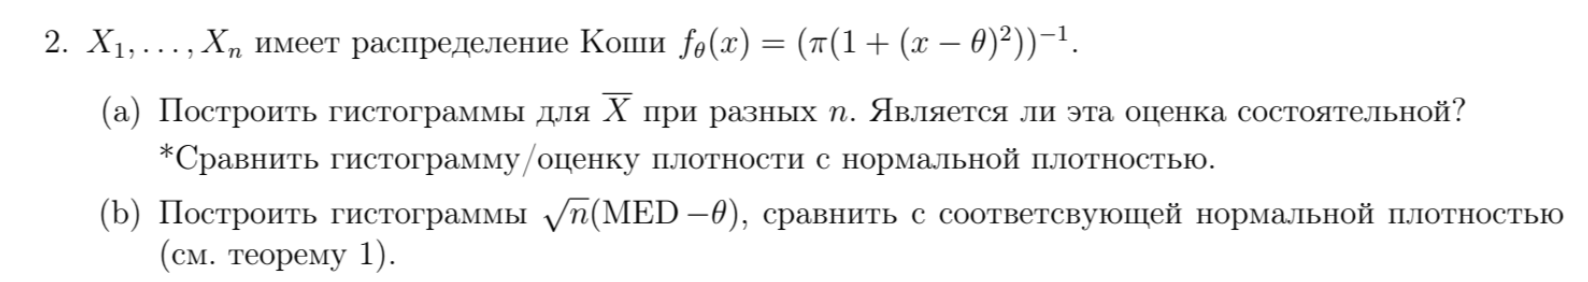

Введите значение параметра:  1
Количество серий:  1000


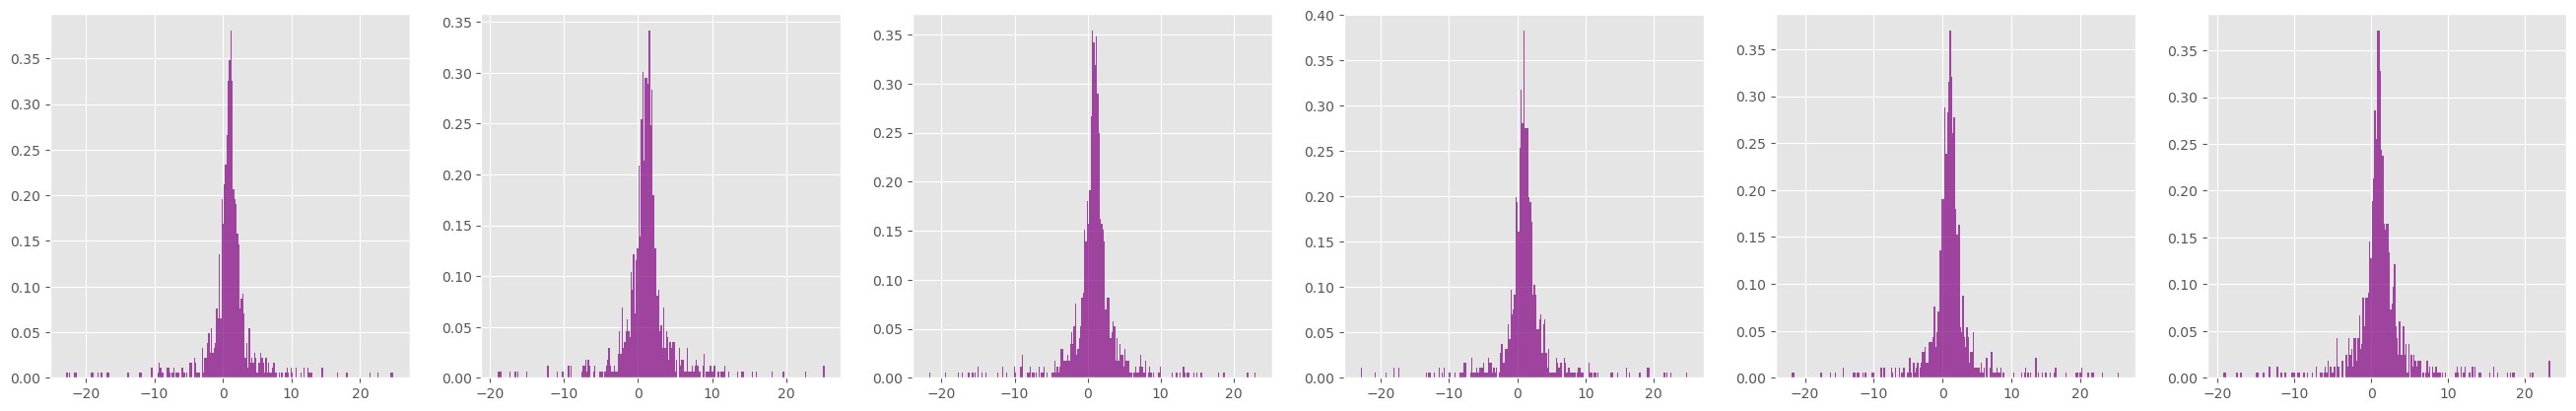

In [38]:
#a)
t = float(input("Введите значение параметра: "))
m = int(input("Количество серий: "))

sample = []

plt.subplots_adjust(left = 0.01, right = 4)

for i in range(6):
    plt.subplot(1, 6, i+1)
    sample = []
    n = 10**(i+1)
    for j in range(m):
        x = sc.stats.cauchy.rvs(t, size=n)
        sample.append(np.mean(x))
        
    sample = np.array(sample)
    sample = sample[(sample < t+25) & (sample > t-25)]
    plt.hist(sample, density=True, color='purple', bins=int(m**0.8), alpha=0.7)

#Вроде бы оценка не является состоятельной.

Введите значение параметра:  1
Количество серий:  10000


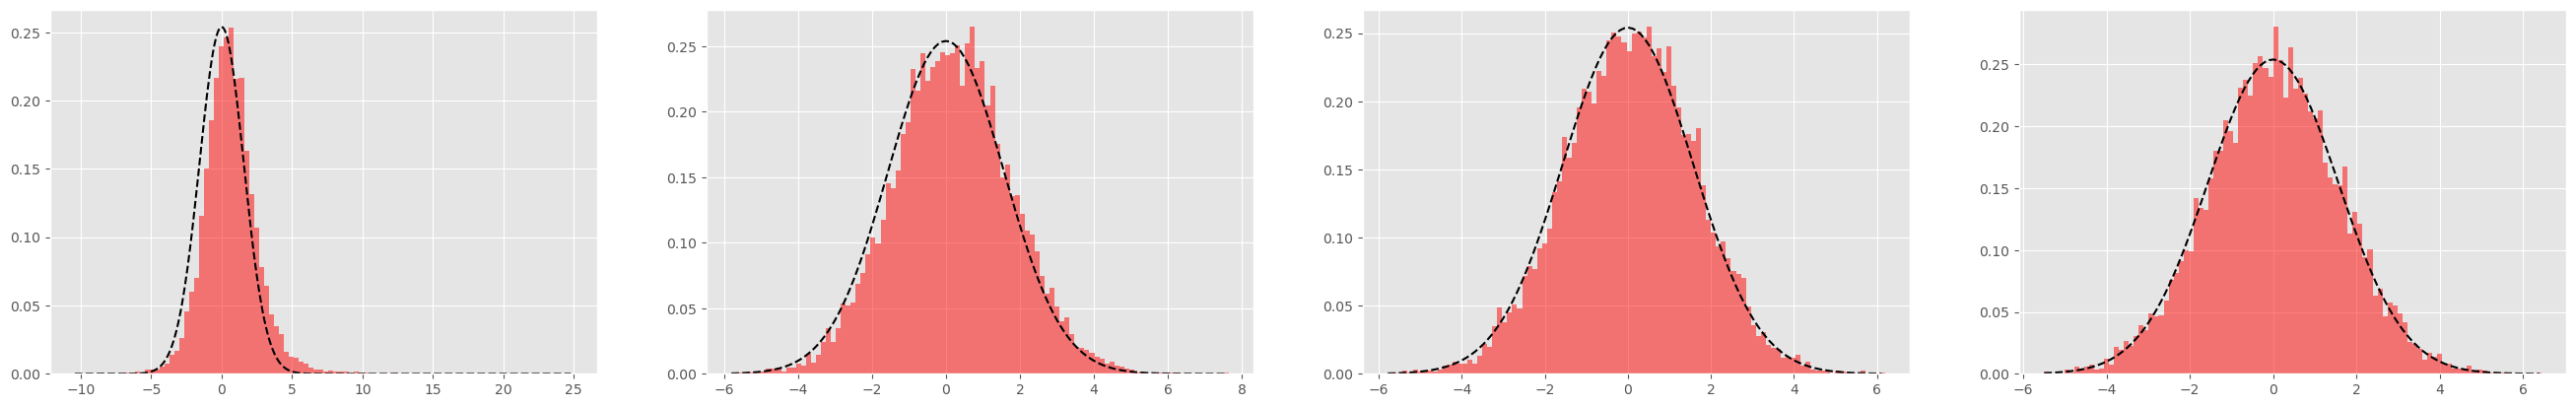

In [8]:
#b)
t = float(input("Введите значение параметра: "))
m = int(input("Количество серий: "))

sample = []

plt.subplots_adjust(left = 0.01, right = 4)

for i in range(1, 5):
    plt.subplot(1, 4, i)
    sample = []
    n = 10**i
    for j in range(m):
        x = sc.stats.cauchy.rvs(t, size=n)
        x = np.sort(x)
        sample.append(n**0.5*(x[int(n/2)]-t))
    
    plt.hist(sample, density=True, bins=int(m**0.5), alpha=0.5, color='red')
    coor = np.arange(min(sample), max(sample), 0.1)
    plt.plot(coor, sc.stats.norm.pdf(coor, 0, 1/(2*sc.stats.cauchy.pdf(t, t))), '--', color='black')

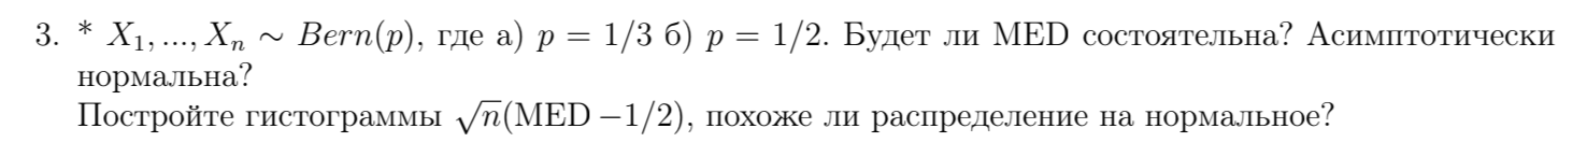

In [4]:
def med(n, p):
    x = np.random.binomial(1, p, n)
    x = np.sort(x)
    if n%2 == 0:
        return (x[int(n/2)] + x[int(n/2)-1])/2
    else:
        return x[int(n/2)]

def func(p, n, m):
    sample = []
    for i in range(m):
        sample.append(med(n, p))

    plt.hist(sample, bins=3, density=True, alpha=0.6, label=str(n))

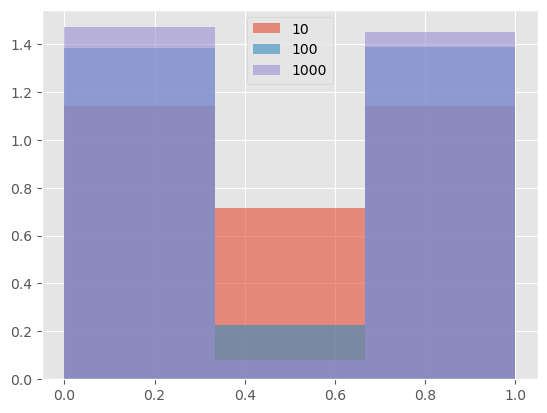

In [5]:
p = 1/2
m = 10000
for i in range(1, 4):
    n = 10**i
    func(p, n, m)
    plt.legend(loc='best')

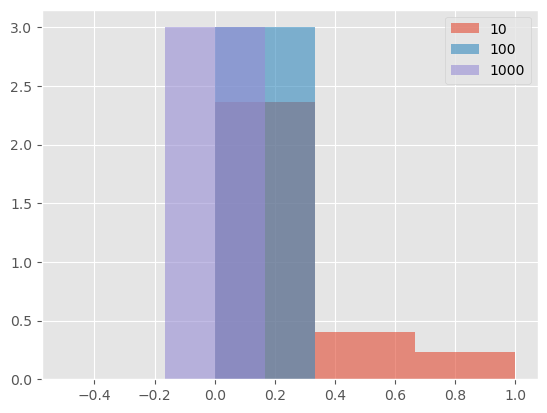

In [6]:
p = 1/3
m = 10000
for i in range(1, 4):
    n = 10**i
    func(p, n, m)
    plt.legend(loc='best')

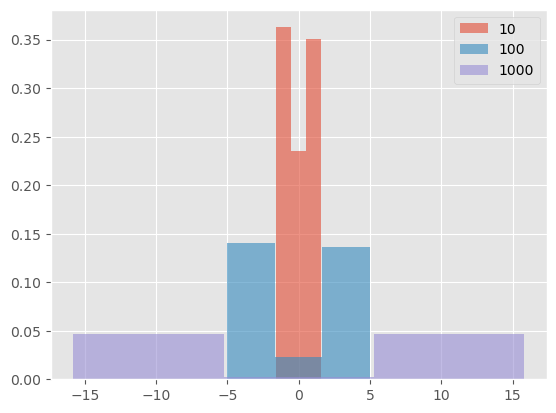

In [7]:
def func(p, n, m):
    sample = []
    for i in range(m):
        sample.append(n**0.5*(med(n, p)-p))
        
    plt.hist(sample, bins=3, density=True, alpha=0.6, label=str(n))
    
p = 1/2
m = 10000
for i in range(1, 4):
    n = 10**i
    func(p, n, m)
    plt.legend(loc='best')

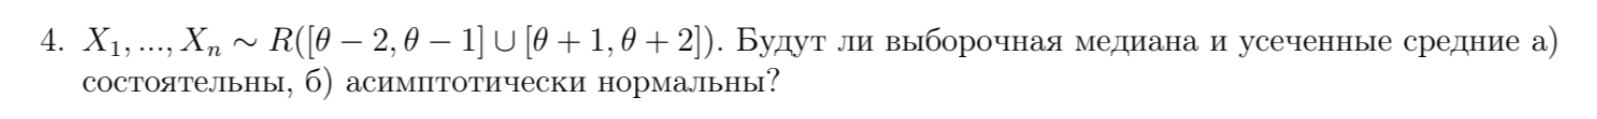

Введите значение параметра:  1


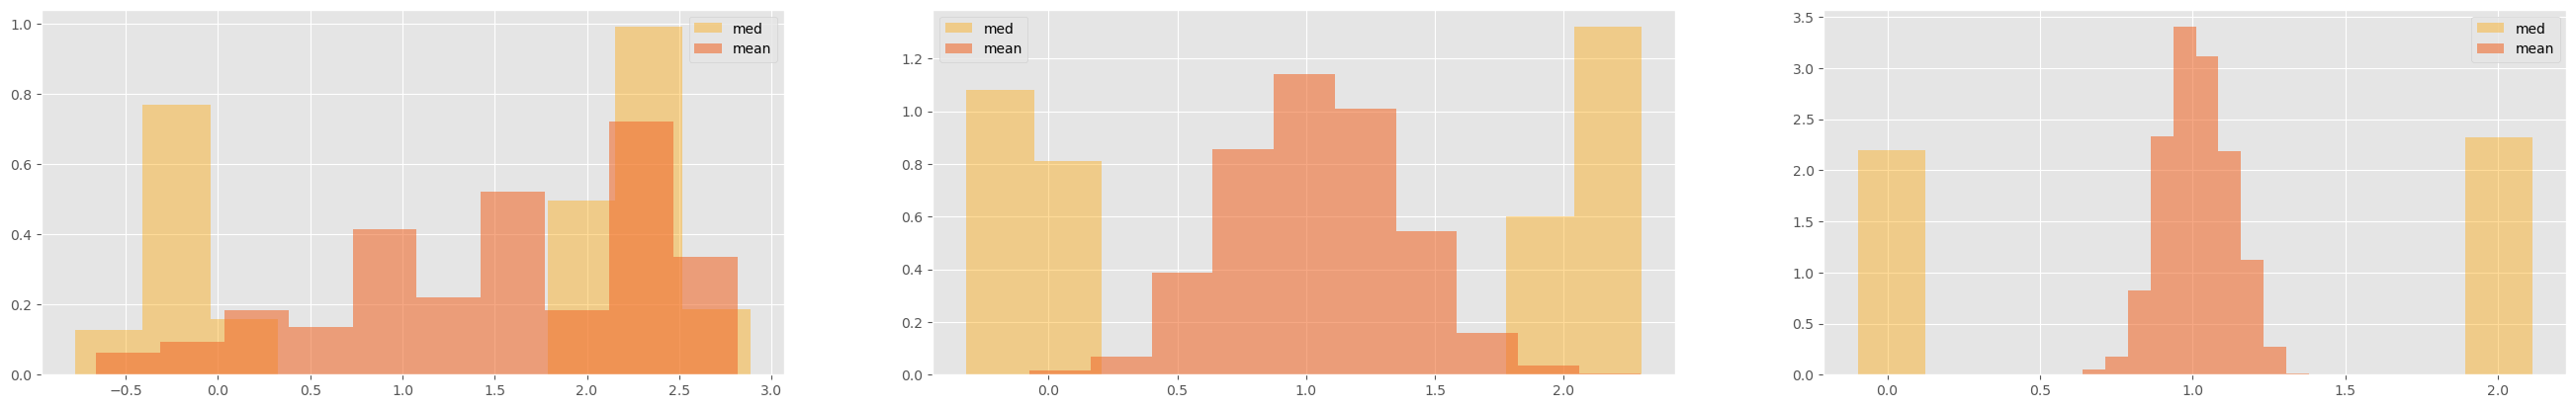

In [3]:
def gen(t):
    x = np.random.binomial(1, 1/2)
    if x == 0:
        x = np.random.uniform(t+1, t+2)
    else:
        x = np.random.uniform(t-2, t-1)
    return x

plt.subplots_adjust(left = 0.01, right = 4)

t = float(input("Введите значение параметра: "))
alpha = 0.3

for i in range(1, 4):
    plt.subplot(1, 3, i)
    n = 10**i
    sample1 = []
    sample2 = []
    for j in range(1000):
        x = [gen(t) for k in range(n)]
        x.sort()
        k = int(alpha*n)
        
        sample1.append(x[int(n/2)])
        sample2.append(sum(x[k+1 : n-k+1])/(n-2*k))
        
    plt.hist(sample1, density=True, alpha=0.4, color='orange', label='med')
    plt.hist(sample2, density=True, alpha=0.6, color='#f06e32', label='mean')
    plt.legend(loc='best')
        

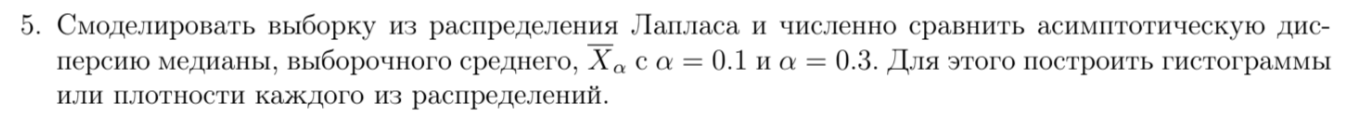

In [10]:
def func(alpha):
    plt.subplots_adjust(left = 0.01, right = 4)

    for i in range(1, 5):
        plt.subplot(1, 4, i)
        n = 10**(i+1)
        sample1 = []
        sample2 = []
        sample3 = []
        for j in range(10000):
            x = sc.stats.laplace.rvs(size=n)
            x.sort()
            
            k = int(alpha*n)

            sample1.append(x[int(n/2)])
            sample2.append(sum(x[k : n-k])/(n-2*k))           
            sample3.append(sum(x)/n)

        plt.hist(sample1, density=True, bins=100, alpha=0.6, color='#ebc334', label='med')
        plt.hist(sample2, density=True, bins=100, alpha=0.6, color='#7a5496', label='trim')
        plt.hist(sample3, density=True, bins=100, alpha=0.6, color='#f06e32', label='mean')
        plt.legend(loc='best')

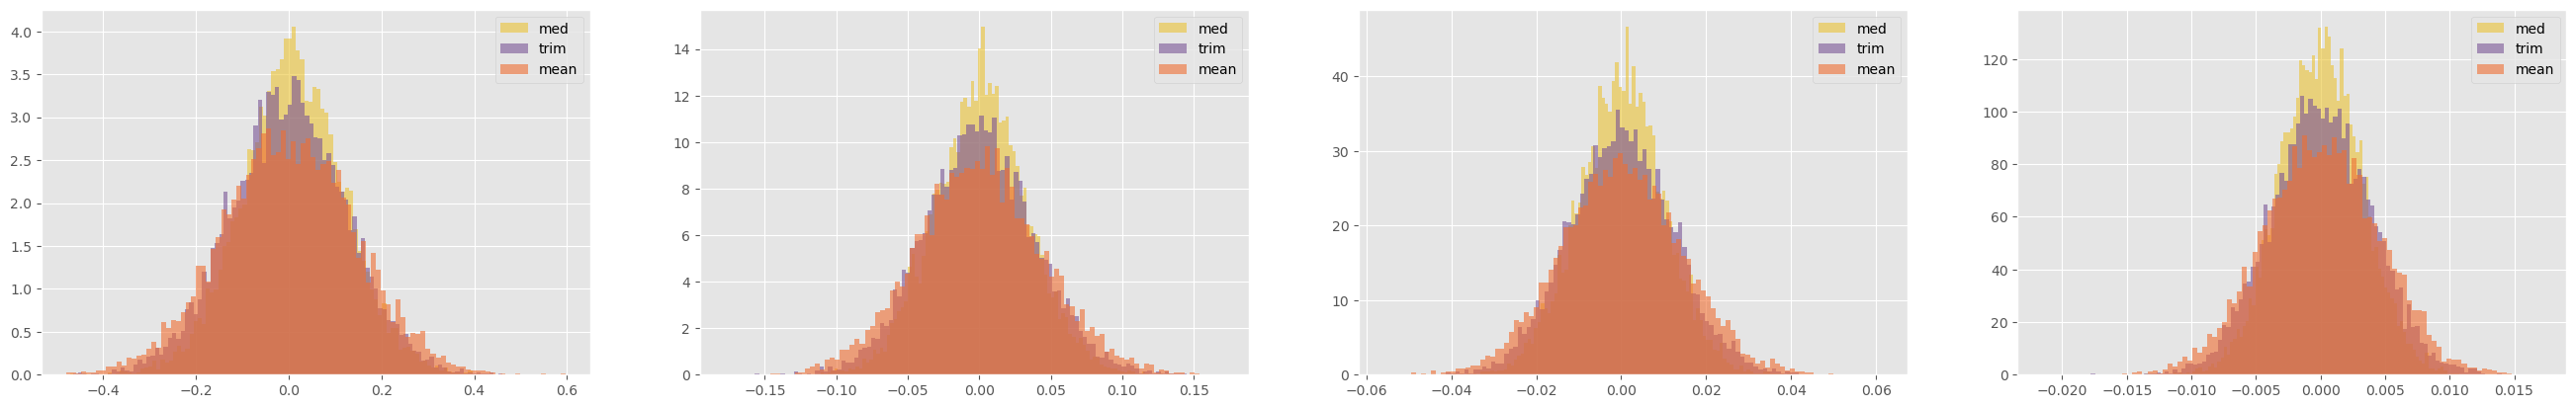

In [11]:
func(0.1)

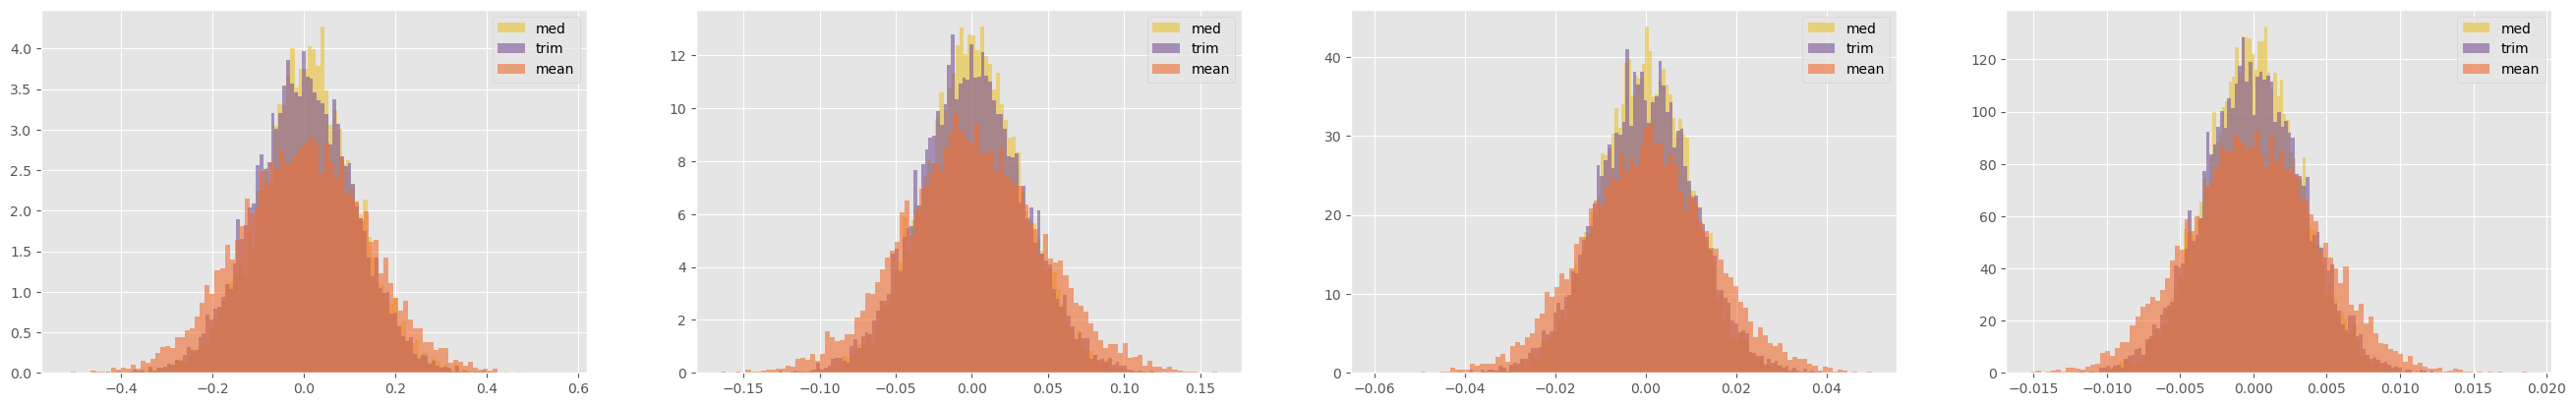

In [12]:
func(0.3)